In [ ]:
# libraries
import matplotlib.pyplot as plt
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import NiftiLabelsMasker
from nilearn import datasets
from nilearn import plotting
import nibabel as nib
import numpy as  np
import os

In [ ]:
# download functional connectivity matrices
dataset = datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=17, resolution_mm=2, data_dir=None, base_url=None, resume=True, verbose=1)
atlas_filename = dataset.maps
#labels = dataset.labels
coords = ['VisCent', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'VisPeri', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SomMot', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'DorsAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SalVentAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Limbic', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Cont', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Default', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',  ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'TempPar', ' ', ' ', ' ', ' ', ' ', 'VisCent', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'VisPeri', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SomMot', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'DorsAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SalVentAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Limbic', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Cont', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Default', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'TempPar', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
labels = np.asarray(coords)
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)
subs = ['106319','123117','211922','178142','562446','704238','180230','168240','129331','419239','154330','137128']
files = ['REST1_LR', 'REST1_RL', 'REST2_LR', "REST2_RL"]
correlation_measure = ConnectivityMeasure(kind='correlation')

for sub in range(0,13):
    os.chdir('/data/hcp_working_folder/tdhore2/subj/' + subs[sub] + '/func')

    for pt in range(0,4):
        img = nib.load('rfMRI_' + files[pt] + '.nii.gz')
        if pt == 0:
            LR1 = masker.fit_transform(img)
            correlation_matrix1 = correlation_measure.fit_transform([LR1])[0]
        elif pt == 1:
            RL1 = masker.fit_transform(img)          
            correlation_matrix2 = correlation_measure.fit_transform([RL1])[0]
        elif pt == 2:
            LR2 = masker.fit_transform(img)
            correlation_matrix3 = correlation_measure.fit_transform([LR2])[0]
        else: 
            RL2 = masker.fit_transform(img)
            correlation_matrix4 = correlation_measure.fit_transform([RL2])[0]
    os.chdir('/data/hcp_working_folder/tdhore2/fc')
    np.savez('fc_' + subs[sub], LR1 = correlation_matrix1, RL1 = correlation_matrix2, LR2 = correlation_matrix3, RL2 = correlation_matrix4)

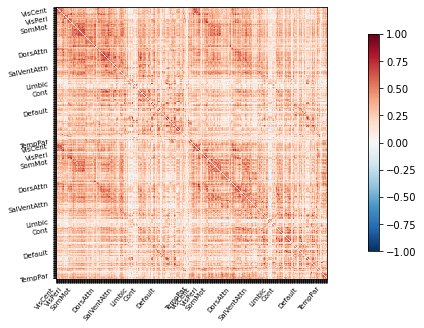

In [1]:
# manually average 12 fc matrices for each scan
os.chdir('/data/hcp_working_folder/tdhore2/fc')
coords = ['VisCent', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'VisPeri', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SomMot', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'DorsAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SalVentAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Limbic', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Cont', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Default', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',  ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'TempPar', ' ', ' ', ' ', ' ', ' ', 'VisCent', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'VisPeri', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SomMot', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'DorsAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SalVentAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Limbic', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Cont', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Default', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'TempPar', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
labels = np.asarray(coords)
subs = ['106319','123117','211922','178142','562446','704238','180230','168240','129331','419239','154330','137128']
LR1_avg = np.zeros((400,400))
RL1_avg = np.zeros((400,400))
LR2_avg = np.zeros((400,400))
RL2_avg = np.zeros((400,400))

for sub in range(0,12):
    npzfile = np.load('fc_' + subs[sub] + '.npz')
    LR1 = npzfile['LR1']
    RL1 = npzfile['RL1']
    LR2 = npzfile['LR2']
    RL2 = npzfile['RL2']
    
    LR1_avg = (LR1_avg + LR1)
    RL1_avg = (RL1_avg + RL1)
    LR2_avg = (LR2_avg + LR2)
    RL2_avg = (RL2_avg + RL2)
    
LR1_avg = LR1_avg/12
RL1_avg = RL1_avg/12
LR2_avg = LR2_avg/12
RL2_avg = RL2_avg/12

# plot LR1 average
np.fill_diagonal(LR1_avg, 0)
plotting.plot_matrix(LR1_avg, labels=labels, colorbar=True, vmax=1.0, vmin=-1.0)

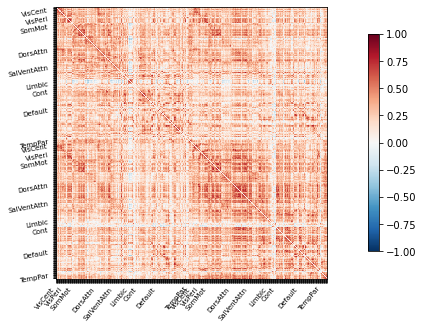

In [2]:
# plot RL1 average
np.fill_diagonal(RL1_avg, 0)
plotting.plot_matrix(RL1_avg, labels=labels, colorbar=True, vmax=1.0, vmin=-1.0)

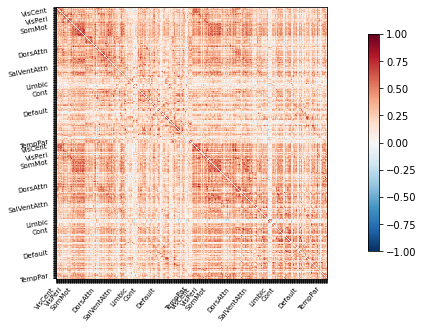

In [4]:
# plot LR2 average
np.fill_diagonal(LR2_avg, 0)
plotting.plot_matrix(LR2_avg, labels=labels, colorbar=True, vmax=1.0, vmin=-1.0)

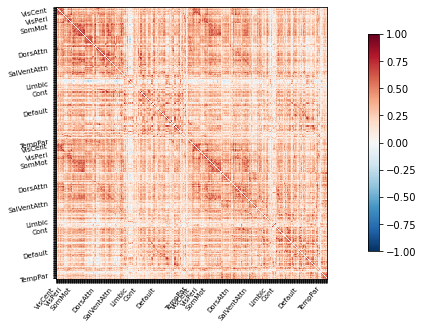

In [6]:
# plot RL2 average
np.fill_diagonal(RL2_avg, 0)
plotting.plot_matrix(RL2_avg, labels=labels, colorbar=True, vmax=1.0, vmin=-1.0)

In [ ]:
# average all 48 scans manually
cm1 = LR1_avg.flatten()
cm2 = RL1_avg.flatten()
cm3 = LR2_avg.flatten()
cm4 = RL2_avg.flatten()
avg_mtx = (LR1_avg + LR2_avg + RL1_avg + RL2_avg) / 4
cm_avg = avg_mtx.flatten()

# plot fc values
plt.hist((cm1,cm2,cm3,cm4), bins=10, alpha=0.45, color=('purple','blue','red','pink'))
plt.legend(['rest1LR','rest1RL','rest2LR','rest2RL'])

<function matplotlib.pyplot.show(close=None, block=None)>

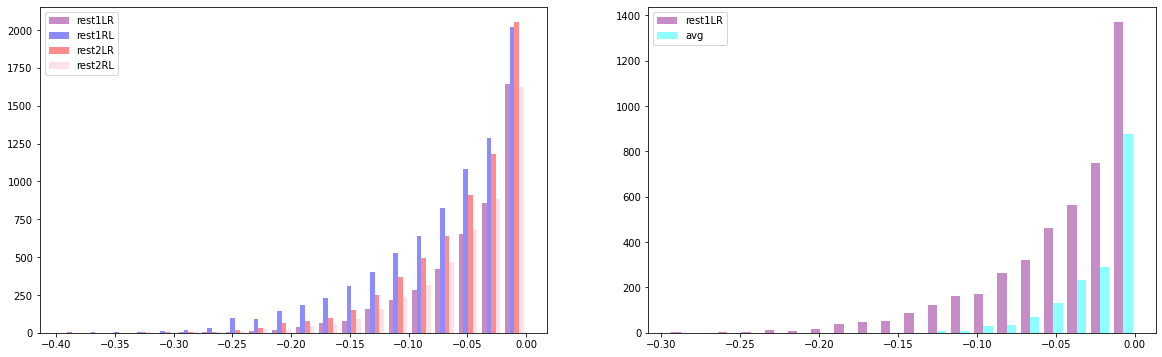

In [9]:
# plot values <0 only
cm1n = cm1[cm1<=0]
cm2n = cm2[cm2<=0]
cm3n = cm3[cm3<=0]
cm4n = cm4[cm4<=0]
cm_avgn = cm_avg[cm_avg<=0]

plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(1, 2, 1)
plt.hist((cm1n,cm2n,cm3n,cm4n), bins=20, alpha=0.45, color=('purple','blue','red','pink'))
plt.legend(['rest1LR','rest1RL','rest2LR','rest2RL'])
plt.subplot(1, 2, 2)
plt.hist((cm1n,cm_avgn), bins=20, alpha=0.45, color=('purple','cyan'))
plt.legend(['rest1LR','avg'])
plt.show